# **Support Vector Machine(SVM)**

## **Exploratory Data Analysis (EDA):**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = pd.read_csv('mushroom.csv')

In [27]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [28]:
data.tail()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199
1999,1073,convex,scaly,yellow,yes,pungent,descending,close,narrow,purple,...,partial,white,two,large,white,numerous,urban,poisonous,13.066414,21.056642


In [29]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [31]:
#Statistics Summery
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [32]:
data.shape

(2000, 26)

In [33]:
#Check for null values
data.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


### **Histogram:**

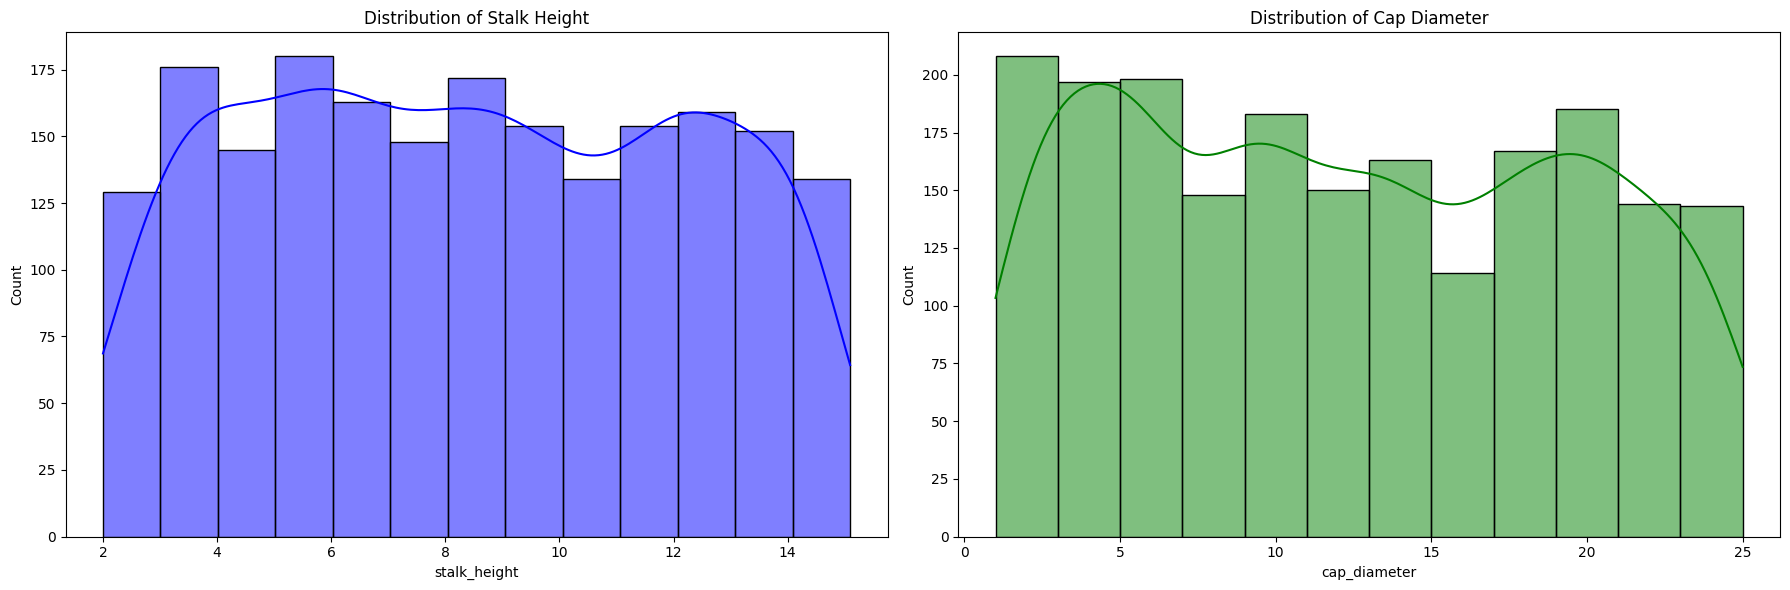

In [34]:
plt.figure(figsize=(18, 6))

# Stalk Height Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['stalk_height'], kde=True, color='blue')
plt.title('Distribution of Stalk Height')

# Cap Diameter Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['cap_diameter'], kde=True, color='green')
plt.title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show()

### **Box Plot:**

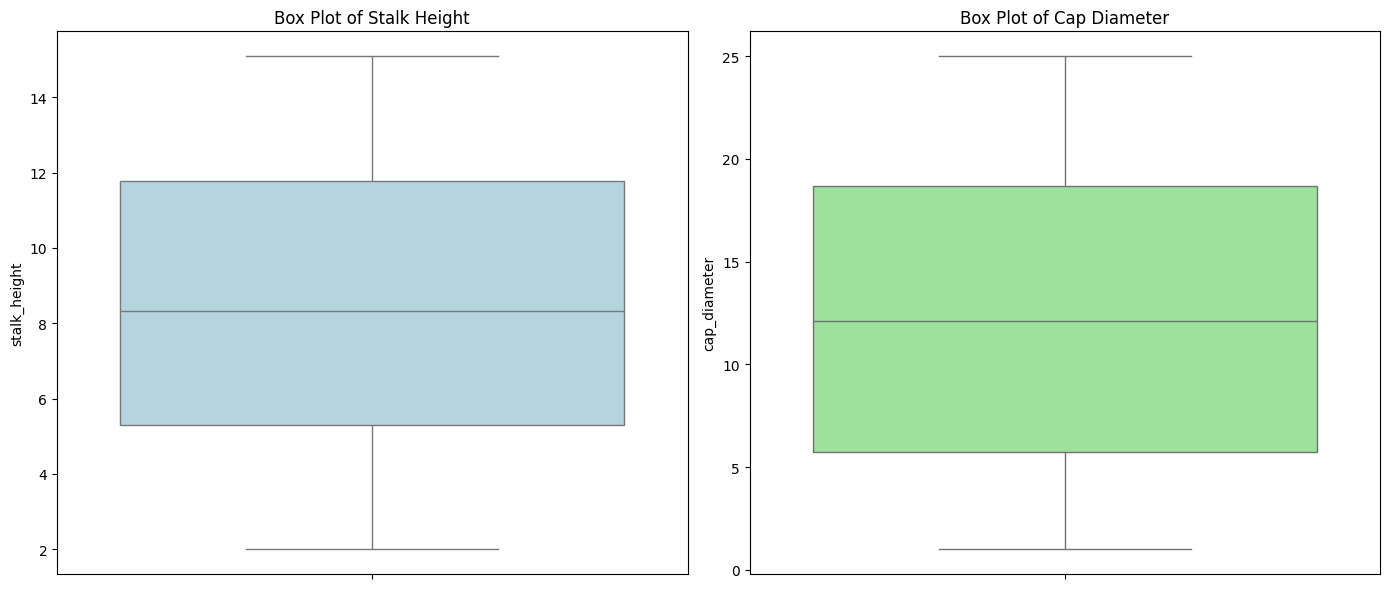

In [35]:
plt.figure(figsize=(14, 6))

# Box plot for 'stalk_height'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['stalk_height'], color='lightblue')
plt.title('Box Plot of Stalk Height')

# Box plot for 'cap_diameter'
plt.subplot(1, 2, 2)
sns.boxplot(y=data['cap_diameter'], color='lightgreen')
plt.title('Box Plot of Cap Diameter')

# Display the plots
plt.tight_layout()
plt.show()

**Investigate feature correlations to discern relationships within the data**

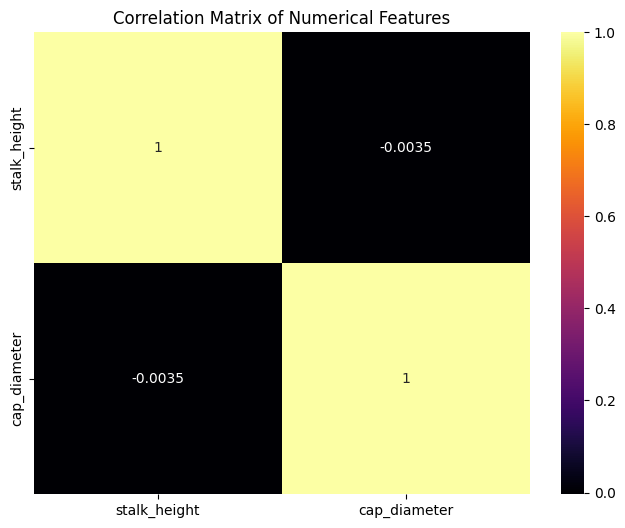

In [36]:
# Correlation matrix for numerical features
correlation_matrix = data[['stalk_height', 'cap_diameter']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## **Data Preprocessing:**

In [37]:
# Encode categorical variables using one-hot encoding
data1 = pd.get_dummies(data, drop_first=True)

# Check the encoded dataset
print(data1.head())


   Unnamed: 0  stalk_height  cap_diameter  cap_shape_conical  \
0        1167     14.276173      5.054983              False   
1        1037      3.952715     19.068319              False   
2         309      9.054265      7.205884              False   
3         282      5.226499     20.932692              False   
4         820     14.037532     12.545245              False   

   cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
0             False           False              True                False   
1             False           False              True                False   
2             False            True             False                 True   
3             False           False             False                False   
4             False            True             False                False   

   cap_surface_scaly  cap_surface_smooth  ...  population_scattered  \
0               True               False  ...                 False   
1   

**Split the dataset into training and testing sets**

In [38]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = data1[['stalk_height','cap_diameter']]
y = data1['class_poisonous']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1600, 2) (400, 2) (1600,) (400,)


## **Data Visualization:**

**Scatter Plot**

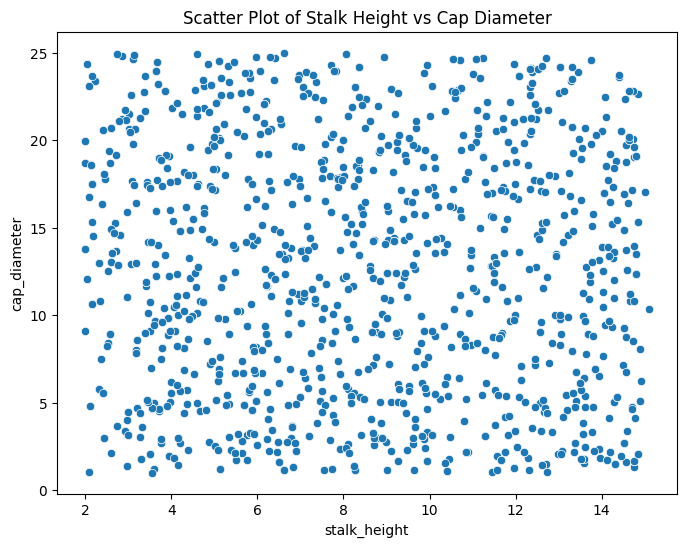

In [39]:
# Scatter plot between 'stalk_height' and 'cap_diameter'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data1, x='stalk_height', y='cap_diameter')
plt.title('Scatter Plot of Stalk Height vs Cap Diameter')
plt.show()


**Bar Plot**

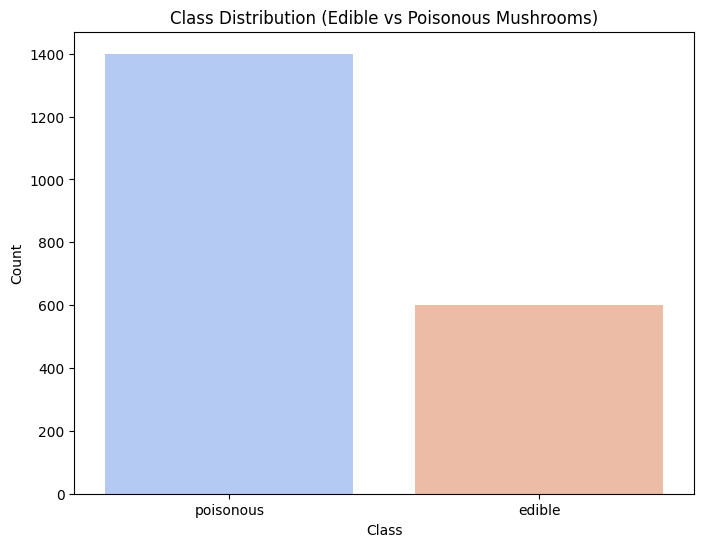

In [40]:
plt.figure(figsize=(8, 6))

# Plot the distribution of the 'class' column
sns.countplot(x='class', data=data, palette='coolwarm')

# Add title and labels
plt.title('Class Distribution (Edible vs Poisonous Mushrooms)')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()


## **SVM Implementation:**

**Normalization:**

In [41]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [42]:
x_train = norm_func(X_train)
x_test =  norm_func(X_test)

**Linear SVM:**

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=2)

# Train the SVM model on the training data
svm_classifier.fit(x_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(x_test)

# Evaluate the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pred_test_linear = svm_classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_linear))


[[  0 124]
 [  0 276]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       124
        True       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400

Accuracy: 0.69


**Visualization of SVM model:**

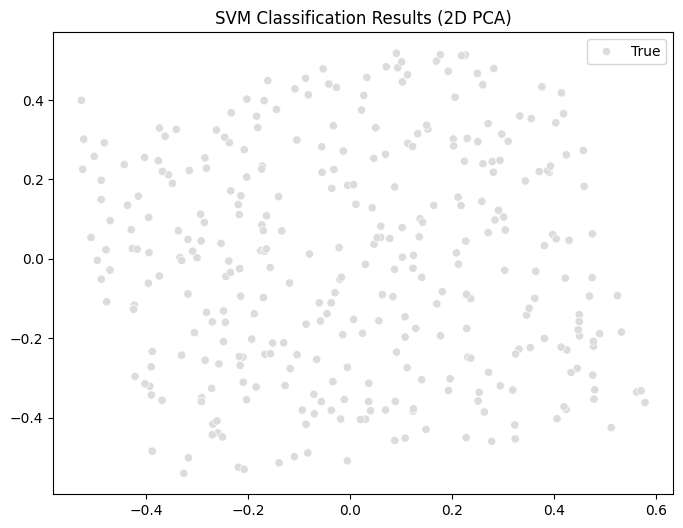

In [46]:
from sklearn.decomposition import PCA

# Reduce the dimensions of the dataset to 2D for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(x_test)

# Plot the SVM classification results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm')
plt.title('SVM Classification Results (2D PCA)')
plt.show()


**RBF SVM:**

In [48]:
# Tuning SVM with a different kernel
svm_classifier_rbf = SVC(kernel='rbf', random_state=42)
svm_classifier_rbf.fit(x_train, y_train)

# Predict with RBF kernel
y_pred_rbf = svm_classifier_rbf.predict(x_test)

# Evaluate the model's performance with RBF kernel
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))
pred_test_rbf = svm_classifier_rbf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, pred_test_rbf))

[[  0 124]
 [  0 276]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       124
        True       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400

Accuracy: 0.69


**Poly SVM:**

In [49]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
y_pred_poly = model_poly.predict(x_test)
# Evaluate the model's performance with Poly kernel
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))
print("Accuracy:",accuracy_score(y_test, y_pred_poly))

[[  0 124]
 [  0 276]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       124
        True       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400

Accuracy: 0.69


**Sigmoid SVM:**

In [50]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
y_pred_sigmoid = model_sigmoid.predict(x_test)
# Evaluate the model's performance with Sigmoid kernel
print(confusion_matrix(y_test, y_pred_sigmoid))
print(classification_report(y_test, y_pred_sigmoid))
print("Accuracy:",accuracy_score(y_test, y_pred_sigmoid))

[[ 41  83]
 [ 89 187]]
              precision    recall  f1-score   support

       False       0.32      0.33      0.32       124
        True       0.69      0.68      0.68       276

    accuracy                           0.57       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.58      0.57      0.57       400

Accuracy: 0.57


## **Comparison and Analysis:**

In [51]:
# Compare various kernel performance
print("Linear Kernel Performance:")
print(classification_report(y_test, y_pred))

print("\nRBF Kernel Performance:")
print(classification_report(y_test, y_pred_rbf))

print("\nPolynomial Kernel Performance:")
print(classification_report(y_test, y_pred_poly))

print("\nSigmoid Kernel Performance:")
print(classification_report(y_test, y_pred_sigmoid))


Linear Kernel Performance:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       124
        True       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400


RBF Kernel Performance:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       124
        True       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41       400
weighted avg       0.48      0.69      0.56       400


Polynomial Kernel Performance:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       124
        True       0.69      1.00      0.82       276

    accuracy                           0.69       400
   macro avg       0.34      0.50      0.41 

Linear,Polynomial and RBF kernels have same accuracy where as Sigmoid has less accuracy